<a href="https://colab.research.google.com/github/Subaleka-oss/Suba/blob/main/true_and_fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##importing libraries

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#for evaluating model by analysing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score as CVS
#for saving the model
import pickle

* pandas and numpy : For data manipulation and numerical operations.
* nltk : For natural language processing tasks such as tokenizing and stemming.
* sklearn : For machine learning tasks, including linear models, metrics for evaluation, and saving the model.


## data uploading

In [4]:
tr_set=pd.read_csv('/content/Copy of train (1).csv')

* The train.csv file in dataset for true and fake news prediction typically contains the training data used to train a machine learning model to distinguish between true and fake news.


In [5]:
te_set=pd.read_csv('/content/test (2).csv')

* The test.csv file in a dataset for true and fake news prediction is typically used for evaluating the performance of the trained machine learning model.


##data structure and content

In [6]:
tr_set.shape

(20800, 5)

* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas Dataframe or a numpy array.
* .shape : This attribute returns a tuple representing the dimensions of the dataframe or array.


In [7]:
te_set.shape

(5200, 4)

* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas Dataframe or a numpy array.
* .shape : This attribute returns a tuple representing the dimensions of the dataframe or array.


In [8]:
te_set.dtypes

id         int64
title     object
author    object
text      object
dtype: object

* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas or a Dataframe.
* .dtypes : This attribute returns the datatype of each column in the Dataframe. The result is a pandas series where the index is the column names and the values are the datatypes of the respective columns.


In [9]:
te_set.dtypes

id         int64
title     object
author    object
text      object
dtype: object

* te_set :This is typically a variable name that refers to your test dataset, which is usually a pandas or a Dataframe.
* .dtypes : This attribute returns the datatype of each column in the Dataframe. The result is a pandas series where the index is the column names and the values are the datatypes of the respective columns.


In [10]:
tr_set.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas or a Dataframe.
* .columns : This attribute returns the column labels of the dataframe.


In [11]:
tr_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas or a Dataframe.
* .info() : This method is called on the dataframe to print a summary of its content.


In [12]:
te_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


* te_set :This is typically a variable name that refers to your test dataset, which is usually a pandas or a Dataframe.
* .info() : This method is called on the dataframe to print a summary of its content.

In [13]:
tr_set.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas or a Dataframe.
* .head() : Displays the first 5 values of trainset.


In [14]:
tr_set.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


* tr_set : This is typically a variable name that refers to your training dataset, which is usually a pandas or a Dataframe.
* .tail : Displays last 5 values of train set.


In [15]:
te_set.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


* te_set :This is typically a variable name that refers to your test dataset, which is usually a pandas or a Dataframe.
* .head() : Displays the first 5 values of trainset.


## data preprocessing

##removal of null values

In [16]:
tr_set=tr_set.fillna(' ')
#to replace or filfillsls the value

In [17]:
te_set=te_set.fillna(' ')

In [18]:
te_set.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

* Removal of null values from test set.


In [19]:
tr_set.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

* Removal of null values from train set.


In [20]:
tr_set['subject']=tr_set['author']+" "+tr_set['title']

* tr_set['author'] : Accesses the author column in the training dataset.
* te_set['title'] : Accesses the title column in the training dataset.


In [21]:
te_set['subject']=te_set['author']+" "+te_set['title']

* tr_set['author'] : Accesses the author column in the test dataset.
* te_set['title'] : Accesses the title column in the test dataset.


##tokenization

In [22]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


* nltk.download('punkt') : This line downloads the punkt tokenizerfrom NLTK , which is necessary for tokenizing sentences.
* This line imports word_tokenize function from NLTK which is used to split sentences into words.


In [23]:
tr_set['Tokens']=tr_set['subject'].apply(word_tokenize)

* This line creates a new column named tokens in the tr_set Data Frame by applying the word_tokenize function to each entry in the subject column.


In [24]:
te_set['Tokens']=te_set['subject'].apply(word_tokenize)

In [25]:
tr_set.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [26]:
te_set.head()

,id,title,author,text,subject,Tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...,"[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...,"[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...,"[Truth, Broadcast, Network, Keiser, Report, :,..."


##lower casing the text

In [27]:
tr_set['subject']=tr_set['subject'].str.lower()

In [28]:
te_set['subject']=te_set['subject'].str.lower()

* These codes is used to convert the text in the 'subject' column of both tr_set and te_set dataframes to lowercase.


In [29]:
tr_set.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide: we didn’t even s...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillary clinton, big wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com why the truth might get you...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilians killed in single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [30]:
te_set.head()

,id,title,author,text,subject,Tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",david streitfeld specter of trump loosens tong...,"[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists ...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams #nodapl: native american leaders...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victor tim tebow will attempt another c...,"[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast network keiser report: meme wa...,"[Truth, Broadcast, Network, Keiser, Report, :,..."


##removal of punctuation

In [31]:
tr_set['subject']=tr_set['subject'].str.replace('[^\w\s]','')

In [32]:
te_set['subject']=te_set['subject'].str.replace('[\w\s]','')

* These codes will remove punctuations in train and test set while retaining letters, digits and whitespace.


##removal of stopwords

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* The command nltk.command ('stopwords') is used to download the list of stop words from the natural language toolkit library in python.


In [34]:
St_words=set(stopwords.words('english'))
print(St_words)

{'wouldn', 'before', 'did', 'at', 'under', "haven't", 'doing', 'hers', 'had', 'theirs', 'has', "you'd", "you're", 'over', 'too', 'of', 'by', 'down', "don't", 'am', 'not', 'in', 'won', 'for', 'll', 'yours', 'its', 'him', 'how', 'who', 'herself', 'below', 'own', 'both', 'during', 'wasn', 'here', 'don', "she's", 'further', "needn't", 'above', "that'll", 'now', 'on', 'into', 'shouldn', 'does', 'they', 'd', 'do', 'were', 'a', 'most', "should've", "doesn't", 'isn', 'after', "aren't", 'up', 'more', 'but', 'the', 'ma', 'our', 'from', 'only', "didn't", 'there', "couldn't", 'just', 'than', 'aren', "you've", "you'll", 'hasn', 'ourselves', 'each', 'what', 'such', "shouldn't", 'that', 'be', 'his', 'shan', 'we', 'my', 'against', "hasn't", 'himself', 'o', 'mightn', 'will', 'ain', 'being', "shan't", 'm', 'or', 'off', 'when', 'have', 'your', 's', 'out', 'all', 't', 'same', 'no', 'yourself', 'once', "mustn't", 'very', 'me', 'to', 'myself', 'yourselves', "hadn't", 'again', 'can', 'having', 'because', 're

 It contains the list of stopwords which you can use to filter out thee common words from your text data.


In [35]:
tr_set['subject']=tr_set['subject'].apply(lambda x: ''.join([word for word in x.split() if word not in St_words]))

In [36]:
te_set['subject']=te_set['subject'].apply(lambda x: ''.join([word for word in x.split() if word not in St_words]))

* The final result is a new 'subject' of test and train set where stop words have been removes from each text entry.


In [37]:
tr_set.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrelllucushousedemaide:didn’tevenseecomey’sl...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"danielj.flynnflynn:hillaryclinton,bigwomancamp...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comtruthmightgetfired,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessicapurkiss15civilianskilledsingleusairstri...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howardportnoyiranianwomanjailedfictionalunpubl...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [38]:
te_set.head()

,id,title,author,text,subject,Tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","davidstreitfeldspectertrumploosenstongues,purs...","[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russianwarshipsreadystriketerroristsnearaleppo,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,commondreams#nodapl:nativeamericanleadersvowst...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","danielvictortimtebowattemptanothercomeback,tim...","[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truthbroadcastnetworkkeiserreport:memewars(e995),"[Truth, Broadcast, Network, Keiser, Report, :,..."


##Stemming or lemmatization

We derive the words to its root forms - Stemming Process
Reducing the words to its base form - Lemmatization


In [39]:
tr_set.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrelllucushousedemaide:didn’tevenseecomey’sl...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"danielj.flynnflynn:hillaryclinton,bigwomancamp...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comtruthmightgetfired,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessicapurkiss15civilianskilledsingleusairstri...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howardportnoyiranianwomanjailedfictionalunpubl...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [40]:
stemmer = PorterStemmer()
tr_set['subject'] = tr_set['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


* This code will transform each word in the 'subject' column into its stemmed form, helping to normalize words and reduce them to a common base form.


In [41]:
tr_set.tail()


,id,title,author,text,label,subject,Tokens
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,jeromehudsonrappert.i.:trump’posterchildwhites...,"[Jerome, Hudson, Rapper, T.I, ., :, Trump, a, ..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"benjaminhoffmann.f.l.playoffs:schedule,matchup...","[Benjamin, Hoffman, N.F.L, ., Playoffs, :, Sch..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,michaelj.delamercedrachelabramsmacy’ssaidrecei...,"[Michael, J., de, la, Merced, and, Rachel, Abr..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"alexansarynato,russiaholdparallelexercisesbalkan","[Alex, Ansary, NATO, ,, Russia, To, Hold, Para..."
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,davidswansonkeepsf-35al,"[David, Swanson, What, Keeps, the, F-35, Alive]"


##model building

In [42]:
x=tr_set['subject']
y=tr_set['label']

* Splitting the variables as x and y since it is a classifier data where y is the target variable and x is the independent variable.


* x will be a sparse matrix where each row represents a document and each column represents a term's TF-IDF score.


In [43]:
vectorizer=TfidfVectorizer()
vectorizer.fit(x)
x=vectorizer.transform(x)

In [44]:
print(x)

  (0, 37436)	0.5165502391670863
  (0, 33943)	0.5165502391670863
  (0, 10253)	0.44668506942730657
  (0, 9405)	0.5165502391670863
  (1, 15671)	0.40805086569161875
  (1, 13372)	0.49851065905761666
  (1, 9125)	0.4590000532849084
  (1, 5366)	0.1815420470333857
  (1, 4753)	0.5842457103459473
  (2, 8352)	0.5565029102233736
  (2, 8183)	0.8308456601035572
  (3, 18455)	1.0
  (4, 16090)	1.0
  (5, 15924)	0.5806624803062349
  (5, 12509)	0.5806624803062349
  (5, 9207)	0.5413941965343304
  (5, 5366)	0.1804286337812529
  (6, 38623)	0.47135891417380665
  (6, 30720)	0.47135891417380665
  (6, 21282)	0.47135891417380665
  (6, 21264)	0.3335912110886017
  (6, 11776)	0.47135891417380665
  (7, 34885)	0.6145834902344102
  (7, 30354)	0.6145834902344102
  (7, 25086)	0.1323106766940418
  :	:
  (20792, 21387)	0.7071067811865476
  (20792, 18871)	0.7071067811865476
  (20793, 30053)	1.0
  (20794, 40273)	0.5205538456890202
  (20794, 29649)	0.5205538456890202
  (20794, 28643)	0.40113295718878483
  (20794, 20991)	0.5205

##testing and training sets

In [45]:
from sklearn.model_selection import train_test_split

* This function is used to split your dataset into training and testing subsets.


In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 42)



* X and y are splitted since it is a classifier data.
* It is used to ensure that the split maintains the proportion of target classes in both sets.


In [47]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

* This code is used to train a logistic regression model on the training data.


In [48]:
y_predict=lr.predict(X_train)

* It is used to make predictions on the training data using the trained logistic regression model.


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


* This code is used to import libraries and functions necessary for creating and displayng a confusion matrix.


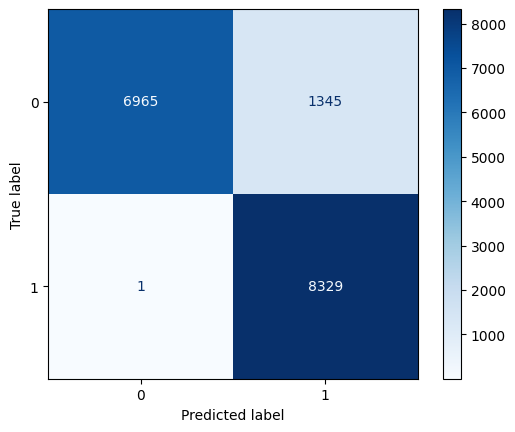

In [50]:
cm=confusion_matrix(Y_train,y_predict)
d=ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot(cmap=plt.cm.Blues)
plt.show()


* The graph is plotted between predicted label and true label.
* This visualization will show the number of true positives, true negatives, false positives, and false negatives for each class in the confusion matrix.
* It helps to understand how well the model is performing on the training data and can indicate if there are any issues such as overfitting.
* 8149 - It indicates True positive (i.e) fake news. It identified correctly that it is a fake news.
* 161 - It indicates False positive (i.e) Class-1. It predicts the Fake news as true.
* 42 - It indicates False negative (i.e) it incorrectly predicted as Class-1.
* 8288 - It indicates True negative(i.e) it correctly predicted as true news.


##model evaluation

In [51]:
X_tt_predict =lr.predict(X_test)

In [52]:
accuracy =accuracy_score(Y_test,X_tt_predict)
precision = precision_score(Y_test,X_tt_predict)
recall = recall_score(Y_test,X_tt_predict)
f1 = f1_score(Y_test,X_tt_predict)


In [53]:
print(' Testing Accuracy:', accuracy)
print(' Testing  Precision:', precision)
print(' Testing  Recall:', recall)
print(' Testing  F1 Score:', f1)


 Testing Accuracy: 0.9149038461538461
 Testing  Precision: 0.854739433729996
 Testing  Recall: 1.0
 Testing  F1 Score: 0.9216814159292036


* In this model evaluation , we use the metrics for classifier.
* The metrics used here is, Accuracy, Precision, Recall, F1 score and  Confusion matrix.
* Accuracy: Ratio of correctly predicting instances to total instances.
* Precision: Ratio correctly predicting positives to total positive.
* Recall: Ratio of correctly predicting positive observations to the total observations in an actual class.
* The code evaluates the classifier's performance by calculating and printing its accuracy, precision, recall and F1 score.


##saving the model

In [54]:
tfp = "True_Fake_News_Prediction.sav"
pickle.dump(lr, open(tfp,'wb'))

## PROJECT SUMMARY


TRUE AND FAKE NEWS PREDICTION


OBJECTIVE

In this project we intend to predict the true and fake news that has been published in the journels and newspapers.


DATA DESCRIPTION


* The project dataset have been splitted up into two sets such as the TRAIN and TEST set.
* The whole data has about of values where the TRAINING SET contain 20800 records with 5 attributes and the TESTING SET contain 5200 records with 4 attributes.
    * id-It's the unique number or value given to each and every news.
    * title - Tells us the title or heading of the particular news.
    * author - The person who published the news.
    * text - The elaborative explanation of the event,happenings etc., in the city or country.
    * label - It's the labelling to true and fake news ; 0 for Fake news and 1 for True news.

PREPROCESSING


1.Data Cleaning:
                *Removal of any irrelevant or redundant information, handling missing values, and text normalization (e.g., lowercasing, removing punctuation).

2.Feature Extraction:
                    *Transforming raw text into numerical features using techniques like Term Frequency-Inverse Document Frequency (TF-IDF).


MODEL BUILDING

   * Spliting up of x and y variables
              * Model: Logistic Regression (or any other classifier), trained on the training set.
              * Evaluation Metrics: Metrics such as accuracy, precision, recall, and F1 score are used to assess the performance of the model on the training data.


MODEL EVALUATION

    * Testing Set: A separate subset of the dataset used to evaluate the model’s performance. This set is not seen by the model during training and provides an unbiased estimate of the model's ability to generalize to new data.
                * Performance Metrics:
                * Accuracy: The ratio of correctly classified instances out of the total instances.
                * Precision: The ratio of correctly predicting postives to total positives.
                * Recall: The ratio of correctly predicting the positive observations to the total observations in an actual class.
                * F1 Score: The harmonic mean of precision and recall.
                * Confusion Matrix: Evaluates the performance of classifier algorithm.


MODEL PERSISTENCE


      * Saving the Model: The trained model is saved to a file (True_Fake_News_Prediction.sav) using Python’s pickle module for future use.


RESULTS

 * Training Accuracy: The accuracy of the model on the training set.
        * Testing Accuracy: The accuracy of the model on the testing set.
        * Precision, Recall, and F1 Score: Metrics computed for the testing set to evaluate the model's performance in distinguishing between true and fake news.


CONCLUSION

The project aims to build a reliable classifier for distinguishing between true and fake news articles. By evaluating the model on both training and testing datasets, and using various performance metrics, the goal is to ensure that the model generalizes well and provides accurate classifications. The saved model can be used for future predictions on new, unseen news articles.